In [ ]:
#dataset source https://machinelearningmastery.com/time-series-datasets-for-machine-learning/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/daily-min-temperatures.csv',index_col=0,parse_dates=True)
df.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


In [3]:
df.tail()

,Temp
Date,
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5
1990-12-30,15.7
1990-12-31,13.0


In [4]:
df['Year'] = df.index.year
df['Month'] = df.index.month_name()

In [5]:
df.shape

(3650, 3)

<AxesSubplot:xlabel='Date'>

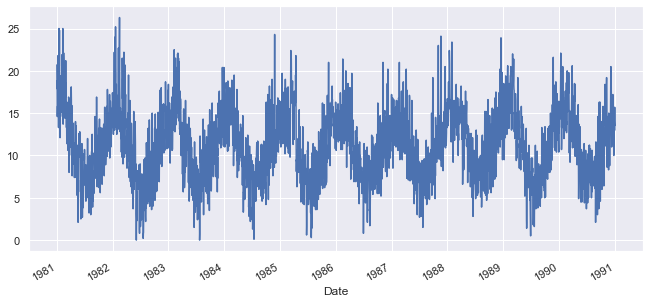

In [6]:
sns.set(rc={'figure.figsize':(11, 5)})
df['Temp'].plot()

<AxesSubplot:xlabel='Date'>

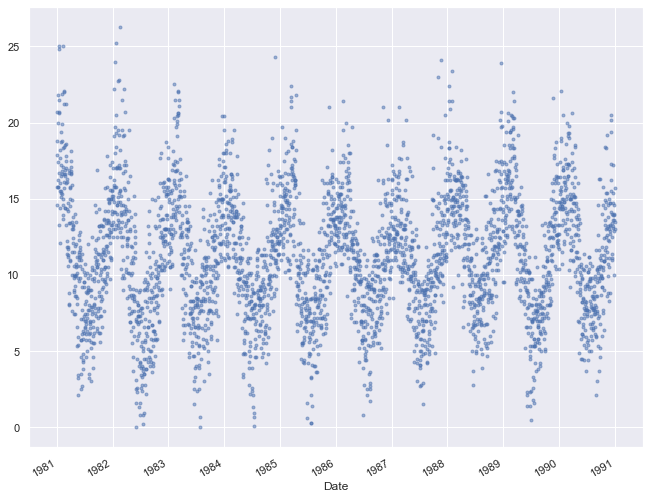

In [7]:
#the plot above seems too crowded, use dots instead. 
df['Temp'].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9))

In [ ]:
#we could clearly see there's a repeating pattern over the year, investigate by zooming in on any of the years.

<AxesSubplot:xlabel='Date'>

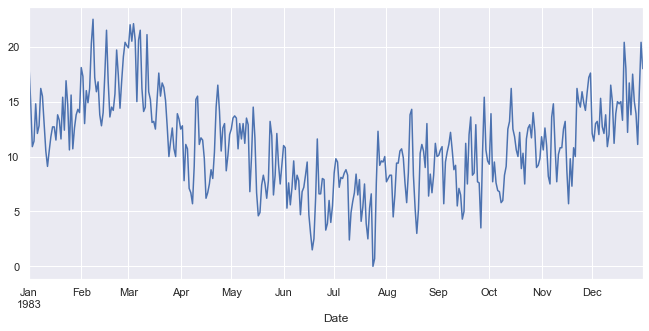

In [21]:
df.loc['1983','Temp'].plot()

In [ ]:
#seems to be too many lines between the month, resample data into weeks to get a plot with less crowded lines btw d months

In [9]:
weekly_temp = df['Temp'].resample('W').mean()
weekly_temp.head()

Date
1981-01-04    18.000000
1981-01-11    17.542857
1981-01-18    20.371429
1981-01-25    15.771429
1981-02-01    16.657143
Freq: W-SUN, Name: Temp, dtype: float64

<AxesSubplot:xlabel='Date'>

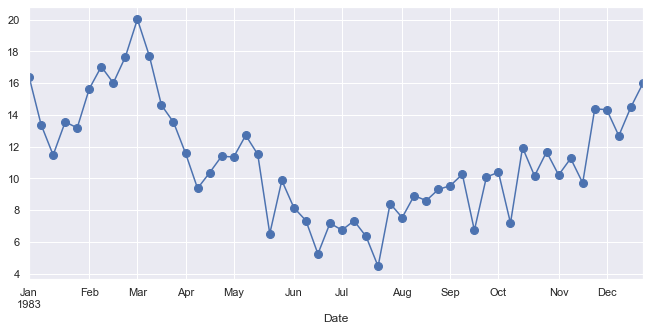

In [12]:
weekly_temp.loc['1983'].plot(marker='o', markersize=8, linestyle='-')

In [22]:
#much better

<AxesSubplot:xlabel='Month', ylabel='Temp'>

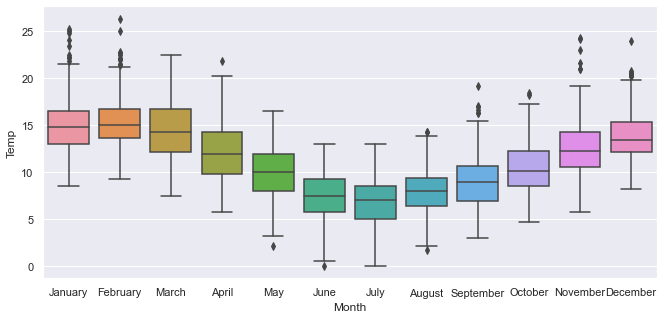

In [13]:
#plot boxplot to see temperature distributions over the months
sns.boxplot(data=df, x='Month', y='Temp')

<AxesSubplot:xlabel='Date'>

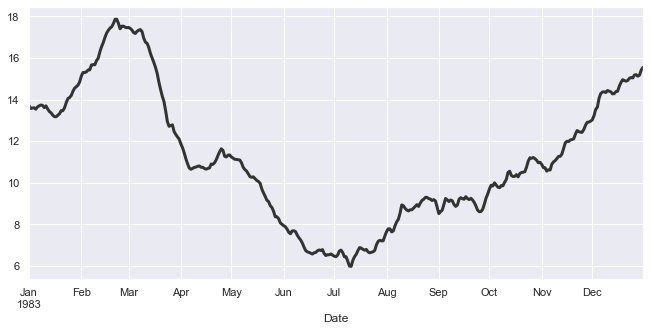

In [20]:
#check for trends using rolling windows
temp_monthly = df['Temp'].rolling(window=31, center=True, min_periods=28).mean()
temp_monthly.loc['1983'].plot(color='0.2', linewidth=3)

In [ ]:
#From the plots above we could infere that there's always a drastic decrease in temperature at d beginning of the year which 
#steadily starts to increase back as the year comes to any end.